In [1]:
import numpy as np
import matplotlib.pyplot as plt

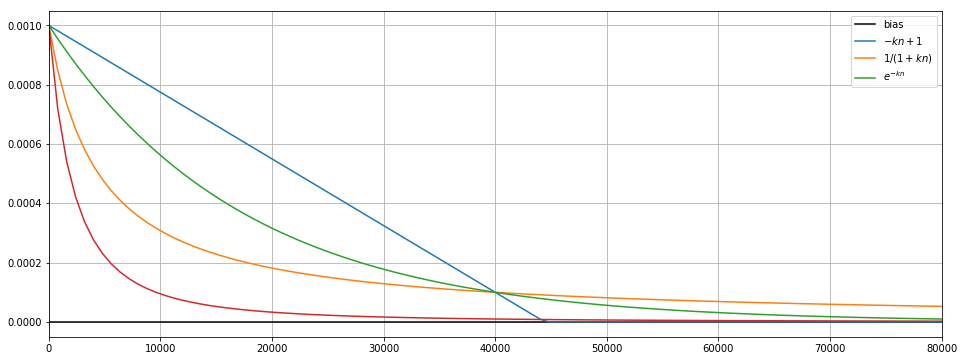

In [94]:
# 0.1 base_lr after 40k iterations

base_lr = 1e-3

# 0.1 base_lr after 40k iterations plus 0.1 base_lr
n_desired = 40000
desired = 0.1
bias = 0.1
minimum = 0.0

# 0.1 base_lr after 40k iterations
bias = 0.0
#n_desired = 40000
desired = (desired-bias) / (1-bias)
minimum = 0.0
base_lr = base_lr * (1-bias)

# iterations
n = np.linspace(0, 80000, 101)

# default
k1 = (1-desired) / n_desired
lr1 = np.maximum( base_lr * (-k1 * n + 1), 0)

lr1 = np.maximum(lr1, base_lr * minimum)
lr1 = lr1 + base_lr * bias

# linear
k2 = (1/desired - 1) / n_desired
lr2 = base_lr * (1 / (1 + k2 * n))

lr2 = np.maximum(lr2, base_lr * minimum)
lr2 = lr2 + base_lr * bias

# exponential
k3 = -1 / n_desired * np.log(desired)
lr3 = base_lr * np.exp(-k3*n)

lr3 = np.maximum(lr3, base_lr * minimum)
lr3 = lr3 + base_lr * bias

# quadratic
k4 = (np.sqrt(1/desired)-1) / n_desired
#lr4 = np.maximum( base_lr * (-k4 * n + 1), 0)
lr4 = base_lr * (1 / (1 + k2 * n)**2)

lr4 = np.maximum(lr4, base_lr * minimum)
lr4 = lr4 + base_lr * bias


plt.figure(figsize=[16, 6])
plt.plot([n[0], n[-1]], [bias*base_lr]*2, 'k')
plt.plot(n, lr1)
plt.plot(n, lr2)
plt.plot(n, lr3)
plt.plot(n, lr4)
plt.grid()
plt.xlim(0, n[-1])
#plt.ylim(0, (1+bias)*base_lr)
plt.legend(['bias', '$-kn+1$', '$1/(1+kn)$', '$e^{-kn}$'])
plt.show()